In [1]:
import pandas as pd
import pyranges as pr
import upsetplot
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [4]:
h5 = 'cerberus_annot.h5'
subset = 'polya'
gids = None
# sources = ['v29', 'v40']
o = 'talon_expressed_polya_1tpm_genes.tsv'
gids = pd.read_csv(o, sep='\t').gene_id.tolist()

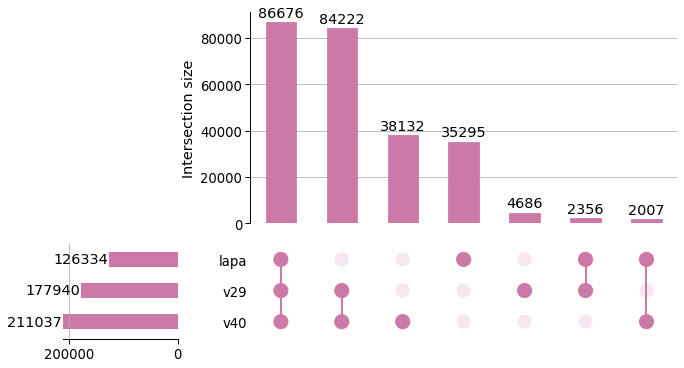

In [5]:
df = plot_ic_upset(h5, 
                   subset=subset,
                   gids=gids)